In [38]:


import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [39]:
results_dir = "./results_odometry_final/kitti/00/"

files_list = os.listdir(results_dir)
#files_list = os.listdir("./Experiment_runs_10000/")



files_list = [os.path.join(results_dir, filename) for filename in files_list]
files_csv_list = list(filter(lambda file_name: ".csv" in file_name, files_list))

In [40]:
files_csv_list

['./results_odometry_final/kitti/00/kitti_00_harris.csv',
 './results_odometry_final/kitti/00/kitti_00_sift.csv',
 './results_odometry_final/kitti/00/kitti_00_iss.csv',
 './results_odometry_final/kitti/00/kitti_00_usip.csv']

In [41]:
extractor_dfs = {}
list_of_extractors = []
for csv_name in files_csv_list:
    extractor_name = csv_name.split('/')[-1].split('_')[2].split('.')[0]
    list_of_extractors.append(extractor_name)
    extractor_dfs[extractor_name] =  pd.read_csv(csv_name)    

In [42]:
list_of_extractors

['harris', 'sift', 'iss', 'usip']

In [43]:
extractor_dfs[list_of_extractors[0]]

,Unnamed: 0,KP_Extract,Matching,KP_count,ATE
0,0,79.981089,0.000000,238,0.088972
1,1,75.894833,14.571667,204,0.223382
2,2,78.596592,4.186392,220,0.316227
3,3,80.724001,3.606081,201,0.388646
4,4,80.765963,3.641844,200,0.445541
...,...,...,...,...,...
4535,4535,104.333162,5.563974,164,98.511768
4536,4536,101.142168,6.558180,169,98.542758
4537,4537,100.592375,7.060766,152,98.573576
4538,4538,101.393938,3.768444,135,98.604253


In [44]:
feature_names =["KP_Extract",	"Matching",	"KP_count",	"ATE"]

In [45]:
extractor_dfs[list_of_extractors[0]]

,Unnamed: 0,KP_Extract,Matching,KP_count,ATE
0,0,79.981089,0.000000,238,0.088972
1,1,75.894833,14.571667,204,0.223382
2,2,78.596592,4.186392,220,0.316227
3,3,80.724001,3.606081,201,0.388646
4,4,80.765963,3.641844,200,0.445541
...,...,...,...,...,...
4535,4535,104.333162,5.563974,164,98.511768
4536,4536,101.142168,6.558180,169,98.542758
4537,4537,100.592375,7.060766,152,98.573576
4538,4538,101.393938,3.768444,135,98.604253


In [46]:
summary_values_extractors = {}

for extractor in extractor_dfs:
    summary_values_extractors[extractor]={}
    extractor_df = extractor_dfs[extractor]
    summary_values_extractors[extractor][feature_names[0]+"_avg"] = extractor_df[feature_names[0]].mean()
    summary_values_extractors[extractor][feature_names[1]+"_avg"] = extractor_df[feature_names[1]].mean()
    summary_values_extractors[extractor]["Total_time"] = summary_values_extractors[extractor][feature_names[0]+"_avg"] +summary_values_extractors[extractor][feature_names[1]+"_avg"]

    summary_values_extractors[extractor][feature_names[3]+"_max"] = extractor_df[feature_names[3]].max()    
    summary_values_extractors[extractor][feature_names[2]+"_avg"] = extractor_df[feature_names[2]].mean()



In [47]:
extractors_summary = pd.DataFrame.from_dict(summary_values_extractors)

In [48]:
extractors_summary.T

,KP_Extract_avg,Matching_avg,Total_time,ATE_max,KP_count_avg
harris,117.933247,4.588190,122.521437,98.634753,157.363436
sift,139.378766,3.832419,143.211185,128.880147,123.563436
iss,82.098641,13.325278,95.423919,32.628598,565.585683
usip,238.652446,8.171587,246.824033,47.989259,512.000000


In [49]:
extractors_summary.T.to_html(results_dir+"odometry_table.html")
extractors_summary.T.to_latex(results_dir+"odometry_table.latex")

In [50]:
x_labels = list(extractors_summary.keys())
y_labels = list(extractors_summary.T.keys())

In [51]:
y_labels

['KP_Extract_avg', 'Matching_avg', 'Total_time', 'ATE_max', 'KP_count_avg']

In [52]:
extractors_summary.T["KP_Extract_avg"]

harris    117.933247
sift      139.378766
iss        82.098641
usip      238.652446
Name: KP_Extract_avg, dtype: float64

In [53]:
# x = np.arange(4)
# width = 0.05
  
# # plot data in grouped manner of bar type
# plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
# plt.bar(x, extractors_summary.T["Matching_avg"], width, color='orange')
# plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
# #plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
# plt.xticks(x, x_labels, rotation=-15)
# plt.xlabel("Extractors")
# plt.ylabel("Metric value")
# plt.legend(y_labels)
# #plt.show()

# plt.savefig(results_dir+"average_time_plot.png")

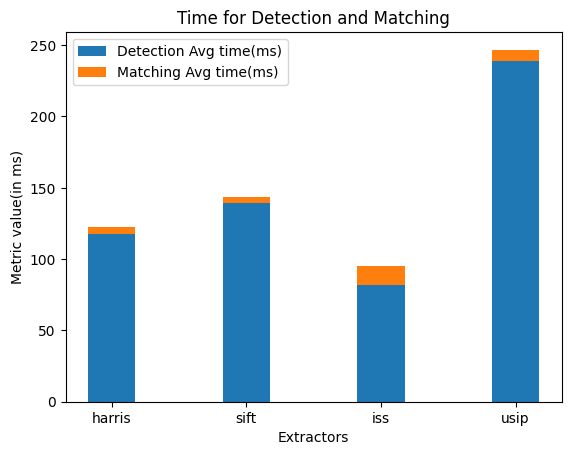

In [58]:

labels =x_labels 
extract_avg =  extractors_summary.T["KP_Extract_avg"] 
match_avg = extractors_summary.T["Matching_avg"]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, extract_avg, width, label='Detection Avg time(ms)')
ax.bar(labels, match_avg, width, bottom=extract_avg,
       label='Matching Avg time(ms)')

plt.xlabel("Extractors")
plt.ylabel("Metric value(in ms)")
ax.set_title('Time for Detection and Matching')
ax.legend()

#plt.show()

plt.savefig(results_dir+"average_time_plot.png")

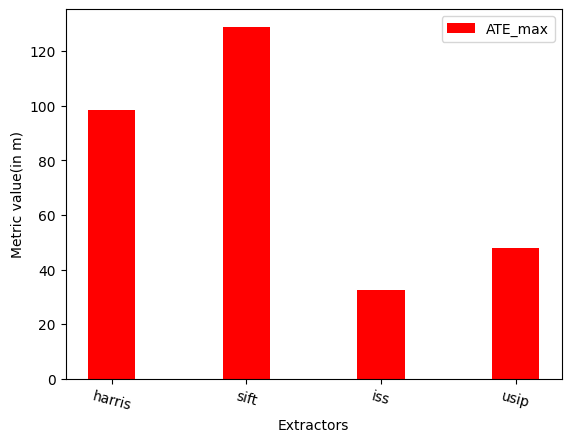

In [59]:
x = np.arange(4)
width = 0.35
  
# plot data in grouped manner of bar type
#plt.bar(x-0.1, extractors_summary.T["KP_Extract_avg"], width, color='cyan')
plt.bar(x, extractors_summary.T["ATE_max"], width, color='red')
#plt.bar(x+0.1, extractors_summary.T["Total_time"], width, color='green')
#plt.bar(x+0.2, extractors_summary.T["ATE_max"], width, color='blue')
plt.xticks(x, x_labels, rotation=-15)
plt.xlabel("Extractors")
plt.ylabel("Metric value(in m)")
plt.legend(y_labels[3:])
#plt.show()

plt.savefig(results_dir+"ATE_plot.png")

In [60]:
extractor_ATEs = {}

for extractor in extractor_dfs:
    extractor_ATEs[extractor]={}
    extractor_df = extractor_dfs[extractor]
    extractor_ATEs[extractor] = extractor_df[feature_names[3]]

In [61]:
ates_df = pd.DataFrame.from_dict(extractor_ATEs)

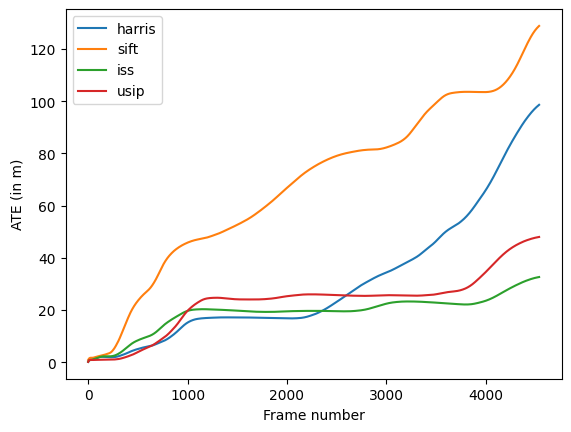

In [62]:
plt.plot(ates_df)
plt.xlabel("Frame number")
plt.ylabel("ATE (in m)")
plt.legend(x_labels)

plt.savefig(results_dir+"ate_per_frame.png")
